# <h5 style = 'font-size:45px'> <span style = 'color:yellow'> Link <span> </h5>
[Markdown꾸미기](https://leedakyeong.tistory.com/entry/Markdown-Jupyter-Notebook-%EC%A3%BC%ED%94%BC%ED%84%B0-%EB%85%B8%ED%8A%B8%EB%B6%81-%EB%A7%88%ED%81%AC%EB%8B%A4%EC%9A%B4-%EC%A0%95%EB%A6%AC)  
[Notion](https://gravel-turnover-821.notion.site/850bc7ba43a44299ae41bd4144d7462f)

<h5> <span style = 'color:blue'> Cow Project<span> </h5>

<img src = 'https://www.newsworks.co.kr/news/photo/202103/537213_423279_554.jpg' width = '500px' height ='300px' title = 'Cow project' alt = 'Error image'></img><br/>

In [1]:
# Using package
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# plot korean title
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import statsmodels.api as sm

<h4> 파일에 존재하는 데이터 한꺼번에 불러오기 </h4>

In [2]:
os.chdir('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\2022-11-25근내지방 5계대')
os.getcwd()

'C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\2022-11-25근내지방 5계대'

In [3]:
# 파일이 존재하는 경로 불러오기 및 리스트
path = os.getcwd()
file_lst = os.listdir(path)# 파일 이름 담기
file_lst

['근내지방5_0.xlsx',
 '근내지방5_1.xlsx',
 '근내지방5_10.xlsx',
 '근내지방5_11.xlsx',
 '근내지방5_12.xlsx',
 '근내지방5_13.xlsx',
 '근내지방5_14.xlsx',
 '근내지방5_15.xlsx',
 '근내지방5_16.xlsx',
 '근내지방5_17.xlsx',
 '근내지방5_2.xlsx',
 '근내지방5_3.xlsx',
 '근내지방5_4.xlsx',
 '근내지방5_5.xlsx',
 '근내지방5_6.xlsx',
 '근내지방5_7.xlsx',
 '근내지방5_8.xlsx',
 '근내지방5_9.xlsx']

##### ↓ 반복문으로 파일 불러오면서, 하나의 DataFrame으로 합침 

In [4]:
df = pd.DataFrame()
for i in file_lst:
    data = pd.read_excel(path +'/'+i)
    df = pd.concat([df,data])
    
df = df.reset_index(drop = True)

In [5]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46310 entries, 0 to 46309
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   이표번호                46310 non-null  int64  
 1   KPN                 46310 non-null  object 
 2   성별                  46310 non-null  object 
 3   출생일                 46310 non-null  object 
 4   도축개월                46310 non-null  int64  
 5   도축일                 46310 non-null  object 
 6   등급                  46310 non-null  object 
 7   도체중                 46310 non-null  int64  
 8   등심단면적               46251 non-null  float64
 9   등지방두께               46258 non-null  float64
 10  근내지방도               46228 non-null  float64
 11  육색                  46310 non-null  int64  
 12  지방색                 46310 non-null  int64  
 13  성숙도                 46310 non-null  int64  
 14  조직도                 46310 non-null  int64  
 15  어미 이표번호             46310 non-null  int64  
 16  형매 도

<h5> 데이터 셋 자체 변수명 중복, 변수명 재설정 필요 </h5>

In [6]:
# 원래 변수명
df.columns = ['이표번호', 'KPN','성별','출생일','도축개월','도축일','등급','도체중','등심단면적','등지방두께', '근내지방도', '육색', '지방색',
	'성숙도', '조직도', '어미_이표번호','형매_도체중_평균', '형매_등심단면적_평균', '형매_등지방_평균', '형매_근내지방_평균',
    '형매_마릿수', '외할미_이표번호', '어미형매_도체중_평균', '어미형매_등심단면적_평균', '어미형매_등지방_평균', '어미형매_근내지방_평균',
    '어미형매_마릿수', '외증조할미_이표번호', '외할미형매_도체중_평균', '외할미형매_등심단면적_평균', '외할미형매_등지방_평균',
    '외할미형매_근내지방_평균', '외할미형매_마릿수', '외고조할미_이표번호', '외증조할미형매_도체중_평균', '외증조할미형매_등심단면적_평균',
    '외증조할미형매_등지방_평균', '외증조할미형매_근내지방_평균', '외증조할미형매_마릿수', '외고고조할미_이표번호',
    '외고조할미형매_도체중_평균', '외고조할미형매_등심단면적_평균', '외고조할미형매_등지방_평균', '외고조할미형매_근내지방_평균',
    '외고조할미형매_마릿수'
]

<h5> 근내지방도 7,8,9 : 1, 나머지: 0 변환 </h5>

In [7]:
df.근내지방도.value_counts().sort_index()

1.0     1143
2.0     2986
3.0     3368
4.0     6786
5.0     5015
6.0    12689
7.0     5003
8.0     4517
9.0     4721
Name: 근내지방도, dtype: int64

In [8]:
cow = df.copy()
cow.head()

,이표번호,KPN,성별,출생일,도축개월,도축일,등급,도체중,등심단면적,등지방두께,...,외증조할미형매_등심단면적_평균,외증조할미형매_등지방_평균,외증조할미형매_근내지방_평균,외증조할미형매_마릿수,외고고조할미_이표번호,외고조할미형매_도체중_평균,외고조할미형매_등심단면적_평균,외고조할미형매_등지방_평균,외고조할미형매_근내지방_평균,외고조할미형매_마릿수
0,2144933791,KPN969,수,2019-09-15,31,2022-03-28,1+B,410,97.0,14.0,...,76.57,11.43,2.86,7,138524360,280.0,64.0,10.0,2.0,1
1,2133571629,KPN1116,거세,2018-10-14,30,2021-03-29,2A,296,73.0,5.0,...,76.57,11.43,2.86,7,138524360,280.0,64.0,10.0,2.0,1
2,2144063782,KPN1053,수,2020-01-01,35,2022-11-23,1B,472,99.0,12.0,...,86.00,12.00,4.33,3,2018926674,427.0,82.0,11.0,3.0,1
3,2139632868,KPN1130,암,2019-06-19,42,2022-11-23,1++A,326,77.0,8.0,...,79.67,8.00,4.67,3,182624452,347.0,84.0,10.0,5.0,1
4,2144690939,KPN1202,암,2019-08-14,40,2022-11-23,1C,403,84.0,17.0,...,83.00,8.00,2.00,1,175189104,276.0,67.0,16.0,3.0,1


In [9]:
cow['근내지방도'] = cow['근내지방도'].apply(lambda x: 1 if x >= 7 else 0 if x < 7 else x)
print(cow.근내지방도.value_counts())
print('\n')
cow.info()

0.0    31987
1.0    14241
Name: 근내지방도, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46310 entries, 0 to 46309
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   이표번호              46310 non-null  int64  
 1   KPN               46310 non-null  object 
 2   성별                46310 non-null  object 
 3   출생일               46310 non-null  object 
 4   도축개월              46310 non-null  int64  
 5   도축일               46310 non-null  object 
 6   등급                46310 non-null  object 
 7   도체중               46310 non-null  int64  
 8   등심단면적             46251 non-null  float64
 9   등지방두께             46258 non-null  float64
 10  근내지방도             46228 non-null  float64
 11  육색                46310 non-null  int64  
 12  지방색               46310 non-null  int64  
 13  성숙도               46310 non-null  int64  
 14  조직도               46310 non-null  int64  
 15  어미_이표번호           46310 non-null 

<h5> 성별 프리마틴, 기타 미경산 제거</h5>

In [10]:
cow.성별.value_counts()

수             16641
암             14950
거세            14637
프리마틴             79
기타(프리마틴 등)        2
미경산               1
Name: 성별, dtype: int64

In [11]:
cow.근내지방도.value_counts()

0.0    31987
1.0    14241
Name: 근내지방도, dtype: int64

In [12]:
# target의 결측치 제거
cow.dropna(subset=['근내지방도'], inplace=True)

In [17]:
c_c_5 = cow.copy()
# indexNames = df[ (df['Price'] >= 30) & (df['Price'] <= 70) ].index
ind = c_c_5[(c_c_5['성별']=='프리마틴')|(c_c_5['성별']=='미경산')|(c_c_5['성별']=='기타(프리마틴 등)')].index
c_c_5.drop(ind, inplace=True)
print(cow.shape)
print(f'성별 제거할 행 개수:{len(ind)}')
print(c_c_5.shape)
print('\n')
print(c_c_5.성별.value_counts())

(46228, 45)
성별 제거할 행 개수:82
(46146, 45)


수     16621
암     14895
거세    14630
Name: 성별, dtype: int64


In [18]:
c_c_5.head()

,이표번호,KPN,성별,출생일,도축개월,도축일,등급,도체중,등심단면적,등지방두께,...,외증조할미형매_등심단면적_평균,외증조할미형매_등지방_평균,외증조할미형매_근내지방_평균,외증조할미형매_마릿수,외고고조할미_이표번호,외고조할미형매_도체중_평균,외고조할미형매_등심단면적_평균,외고조할미형매_등지방_평균,외고조할미형매_근내지방_평균,외고조할미형매_마릿수
0,2144933791,KPN969,수,2019-09-15,31,2022-03-28,1+B,410,97.0,14.0,...,76.57,11.43,2.86,7,138524360,280.0,64.0,10.0,2.0,1
1,2133571629,KPN1116,거세,2018-10-14,30,2021-03-29,2A,296,73.0,5.0,...,76.57,11.43,2.86,7,138524360,280.0,64.0,10.0,2.0,1
2,2144063782,KPN1053,수,2020-01-01,35,2022-11-23,1B,472,99.0,12.0,...,86.00,12.00,4.33,3,2018926674,427.0,82.0,11.0,3.0,1
3,2139632868,KPN1130,암,2019-06-19,42,2022-11-23,1++A,326,77.0,8.0,...,79.67,8.00,4.67,3,182624452,347.0,84.0,10.0,5.0,1
4,2144690939,KPN1202,암,2019-08-14,40,2022-11-23,1C,403,84.0,17.0,...,83.00,8.00,2.00,1,175189104,276.0,67.0,16.0,3.0,1


In [19]:
c_c_5.성별.value_counts()

수     16621
암     14895
거세    14630
Name: 성별, dtype: int64

<h5> train_test_split, 7:3 </h5>

In [20]:
X = c_c_5.drop(['근내지방도'],axis=1)
Y = c_c_5.근내지방도
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 7777)

<h5> 독립변수, 종속변수 합치기 나중에 데이터 불러오기 쉽게 </h5>

In [21]:
X_test.head()

,이표번호,KPN,성별,출생일,도축개월,도축일,등급,도체중,등심단면적,등지방두께,...,외증조할미형매_등심단면적_평균,외증조할미형매_등지방_평균,외증조할미형매_근내지방_평균,외증조할미형매_마릿수,외고고조할미_이표번호,외고조할미형매_도체중_평균,외고조할미형매_등심단면적_평균,외고조할미형매_등지방_평균,외고조할미형매_근내지방_평균,외고조할미형매_마릿수
33973,2141238667,KPN1062,거세,2019-05-25,30,2021-10-25,1+C,445,96.0,23.0,...,77.17,10.17,3.00,6,177872226,302.00,74.00,17.00,4.0,1
35829,2104865596,KPN883,암,2016-02-12,43,2019-08-30,2A,382,86.0,5.0,...,82.83,12.33,2.67,6,159665888,330.83,77.50,9.83,3.0,6
12190,2097962920,KPN879,거세,2015-04-23,36,2018-04-03,1C,537,85.0,12.0,...,90.14,12.86,4.43,7,158655228,349.50,77.75,20.25,2.5,4
9952,2133015227,KPN1087,수,2019-02-20,31,2021-09-13,1+B,437,80.0,11.0,...,93.00,14.00,7.00,1,188895917,405.00,93.00,16.00,8.0,1
13930,2135155404,KPN1133,수,2019-03-05,28,2021-06-28,1++A,346,89.0,10.0,...,72.25,14.00,3.75,4,148539052,0.00,0.00,0.00,0.0,1


In [22]:
Y_test.head()

33973    0.0
35829    0.0
12190    0.0
9952     0.0
13930    1.0
Name: 근내지방도, dtype: float64

In [23]:
train = pd.concat([X_train,Y_train], axis=1)
test = pd.concat([X_test,Y_test], axis=1)

In [46]:
train.to_csv('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\5계대 정리\\5_train.csv',encoding='cp949',index=False)
test.to_csv('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\5계대 정리\\5_test.csv',encoding='cp949',index=False)
cow.to_csv('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\5계대 정리\\5__data_full.csv',encoding='cp949',index=False)

In [2]:
train = pd.read_csv('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\5계대 정리\\5_train.csv',encoding='cp949')
test = pd.read_csv('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\5계대 정리\\5_test.csv',encoding='cp949')

In [24]:
train.head()

,이표번호,KPN,성별,출생일,도축개월,도축일,등급,도체중,등심단면적,등지방두께,...,외증조할미형매_등지방_평균,외증조할미형매_근내지방_평균,외증조할미형매_마릿수,외고고조할미_이표번호,외고조할미형매_도체중_평균,외고조할미형매_등심단면적_평균,외고조할미형매_등지방_평균,외고조할미형매_근내지방_평균,외고조할미형매_마릿수,근내지방도
16915,2129058010,KPN1076,거세,2018-10-29,30,2021-04-20,1+B,446,83.0,13.0,...,15.33,4.33,6,157475180,281.00,69.00,8.00,2.00,1,0.0
7437,2144699219,KPN1339,거세,2019-09-08,30,2022-03-07,1++C,500,95.0,17.0,...,19.00,6.00,2,182942587,390.82,88.36,16.91,5.45,11,1.0
22509,2101922016,KPN953,수,2016-04-04,30,2018-09-05,1++B,466,101.0,10.0,...,6.25,3.75,4,162359014,332.67,85.67,11.00,3.33,3,1.0
9446,2115911563,KPN1030,수,2017-03-21,30,2019-08-21,1++A,411,103.0,7.0,...,16.43,4.57,7,186370454,381.00,88.50,15.75,4.75,4,1.0
12306,2137954953,KPN1085,거세,2019-03-31,28,2021-07-28,1B,409,95.0,16.0,...,21.25,3.50,4,197918690,317.75,77.50,10.75,6.25,4,0.0


<h5> Logistic Regression </h5>

In [27]:
train = train.astype({'근내지방도':'int64'})
train = train.astype({'근내지방도':'category'})
train.dtypes
test = test.astype({'근내지방도':'int64'})
test = test.astype({'근내지방도':'category'})
test.dtypes

이표번호                   int64
KPN                   object
성별                    object
출생일                   object
도축개월                   int64
도축일                   object
등급                    object
도체중                    int64
등심단면적                float64
등지방두께                float64
육색                     int64
지방색                    int64
성숙도                    int64
조직도                    int64
어미_이표번호                int64
형매_도체중_평균            float64
형매_등심단면적_평균          float64
형매_등지방_평균            float64
형매_근내지방_평균           float64
형매_마릿수                 int64
외할미_이표번호               int64
어미형매_도체중_평균          float64
어미형매_등심단면적_평균        float64
어미형매_등지방_평균          float64
어미형매_근내지방_평균         float64
어미형매_마릿수               int64
외증조할미_이표번호             int64
외할미형매_도체중_평균         float64
외할미형매_등심단면적_평균       float64
외할미형매_등지방_평균         float64
외할미형매_근내지방_평균        float64
외할미형매_마릿수              int64
외고조할미_이표번호             int64
외증조할미형매_도체중_평균       float64
외증조할미형매_등심단면적_

In [28]:
print(train.근내지방도.unique())
print(test.근내지방도.unique())

[0, 1]
Categories (2, int64): [0, 1]
[0, 1]
Categories (2, int64): [0, 1]


In [31]:
train_x = train.drop(['이표번호', 'KPN', '출생일', '도축일', '등급', '등심단면적',
       '등지방두께', '육색', '지방색', '성숙도', '조직도', '어미_이표번호', '외할미_이표번호',
       '외증조할미_이표번호', '외고조할미_이표번호', '외고고조할미_이표번호', '근내지방도'],axis=1)
train_y = train['근내지방도']

In [32]:
test_x = test.drop(['이표번호','KPN','출생일','도축일','등급','등심단면적','등지방두께','육색','지방색','성숙도','조직도','어미_이표번호','외할미_이표번호',
    '외증조할미_이표번호','외고조할미_이표번호','외고고조할미_이표번호','근내지방도'],axis=1)
test_y = test['근내지방도']

In [33]:
t_x = train_x.copy()
t_x = pd.get_dummies(t_x, columns=['성별'], drop_first=True)

te_x = test_x.copy()
te_x = pd.get_dummies(te_x, columns=['성별'], drop_first=True)

In [34]:
train_y.unique()

[0, 1]
Categories (2, int64): [0, 1]

In [35]:
train_y.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [36]:
model = sm.Logit(train_y, t_x)

In [37]:
results = model.fit(method='newton')
pr_y = results.predict(te_x)
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.357308
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  근내지방도   No. Observations:                32302
Model:                          Logit   Df Residuals:                    32273
Method:                           MLE   Df Model:                           28
Date:                Fri, 27 Jan 2023   Pseudo R-squ.:                  0.4203
Time:                        14:27:42   Log-Likelihood:                -11542.
converged:                       True   LL-Null:                       -19910.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
도축개월                -0.0269      0.003    -10.470      0.000      -0.032      -0.022
도체중        

In [38]:
pr_y

33973    0.213445
35829    0.000529
12190    0.157204
9952     0.310293
13930    0.928849
           ...   
21566    0.318415
42615    0.133082
37045    0.951623
42279    0.844393
18791    0.029206
Length: 13844, dtype: float64

In [39]:
print(f'0.5보다 작은 것 개수:{len(pr_y[pr_y>0.5])}')
print(f'0.5보다 큰 것 개수:{len(pr_y[pr_y<=0.5])}')
print(f'0.5 개수:{len(pr_y[pr_y==0.5])}')

0.5보다 작은 것 개수:3742
0.5보다 큰 것 개수:10102
0.5 개수:0


In [40]:
pr_y = pr_y.apply(lambda x: 1 if x > 0.5 else 0 )

In [41]:
pr_y.value_counts()

0    10102
1     3742
dtype: int64

<h5> 성과지표 </h5>

In [42]:
print(classification_report(test_y, pr_y, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.86      0.91      0.89      9533
     class 1       0.78      0.68      0.73      4311

    accuracy                           0.84     13844
   macro avg       0.82      0.80      0.81     13844
weighted avg       0.84      0.84      0.84     13844



In [43]:
import sklearn.metrics as metrics

AUC:0.7955551268113258


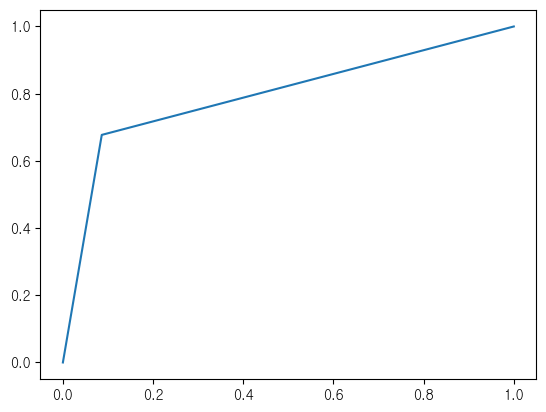

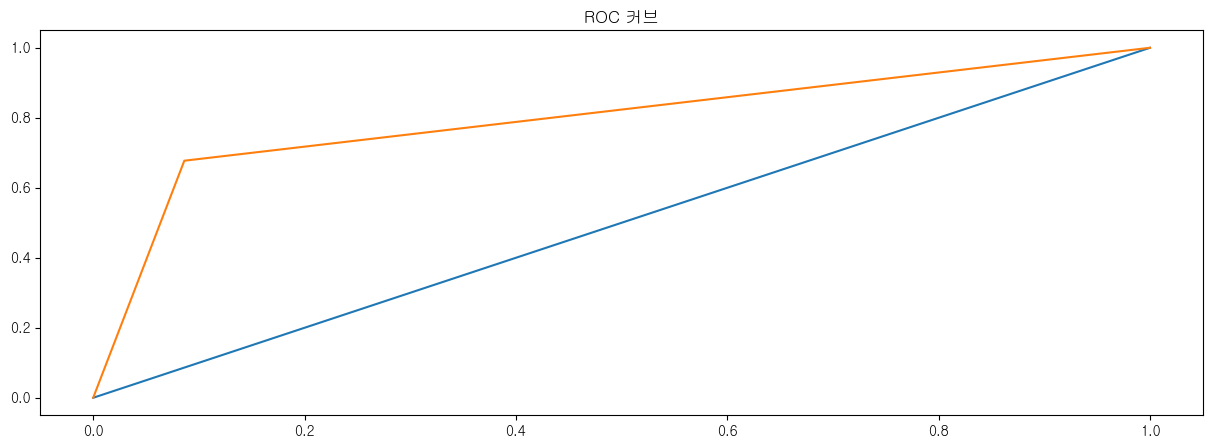

In [45]:
# sklearn에서 ROC 패키지 활용
fpr, tpr, thresholds = metrics.roc_curve(test_y, pr_y,pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print(f'AUC:{auc}')


plt.figure(figsize=(15, 5))

plt.plot([0,1], [0, 1], label='STR')


plt.plot(fpr, tpr, label='ROC')
plt.title('ROC 커브')
plt.show()

In [48]:
confusion_matrix(test_y,pr_y, labels=[1,0])

array([[2920, 1391],
       [ 822, 8711]], dtype=int64)